In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import logging
from ImmuneGWAS.helpers.getpaths import get_paths, get_sumstats_path
from ImmuneGWAS.helpers import dbsnp, ldlink
import ImmuneGWAS.resources.immune_GWAS as immune_GWAS
from ImmuneGWAS import config
from ImmuneGWAS.variant import Variant

Designing the lookup:

1) Variant object calls trans_df lookup
2) Harmonize according to EA/OA, raise exceptions for multi-allelic SNPs
3) Split trans_df into up and down
4) Return row-scaled heatmap df where cell ordering is hard-coded and rows are resorted for clustering
5) Plotting function for heatmap df
6) Get flow phenotypes
7) Get LDTrait phenotypes
8) Summarize phenotpyes into tables with betas (remove duplicate phenotypes etc)
9) Get a single summary cis-eQTL table
10) Return summary report - 2 heatmaps for up and down, cis-eQTLs, phenotypes summarized

In [6]:
rsid = "rs1354034"
chrom = 3
pos = 56815721
EA = 'T'
OA = 'C'

x = Variant(rsid, chrom, pos, EA, OA)

In [9]:
x.rsid

'rs1354034'

In [10]:
ldlink.ldtrait(x)

,Query,GWAS Trait,RS Number,Position (GRCh38),Alleles,R2,D,Risk Allele,Effect Size (95% CI),Beta or OR,P-value
1,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,0.04552,0.037-0.054,5E-27
2,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,NA,NA,3E-13
3,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.57,5.87,4.3-7.44,2E-13
4,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.6023,0.137851,0.13-0.15,9E-301
5,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.4092,9.443,6.3-12.59,4E-9
6,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,10.4352,8.18-12.69,1E-19
7,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.27,11.44,8.31-14.57,9E-13
8,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,6.848,5.98-7.7110^9/,3E-54
9,rs1354034,Mean platelet volume,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,0.023,0.021-0.025(),3E-69
10,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.61,7.97,NA,6E-24


In [13]:
x.results.ldtrait_df

,Query,GWAS Trait,RS Number,Position (GRCh38),Alleles,R2,D,Risk Allele,Effect Size (95% CI),Beta or OR,P-value
1,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,0.04552,0.037-0.054,5E-27
2,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,NA,NA,3E-13
3,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.57,5.87,4.3-7.44,2E-13
4,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.6023,0.137851,0.13-0.15,9E-301
5,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.4092,9.443,6.3-12.59,4E-9
6,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,10.4352,8.18-12.69,1E-19
7,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.27,11.44,8.31-14.57,9E-13
8,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,6.848,5.98-7.7110^9/,3E-54
9,rs1354034,Mean platelet volume,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,NR,0.023,0.021-0.025(),3E-69
10,rs1354034,Platelet count,rs1354034,chr3:56815721,"C=0.599, T=0.401",1.0,1.0,0.61,7.97,NA,6E-24


In [ ]:
x.LDblock

In [34]:
from Immresources.eqtlgen import eqtlgen_trans_LDblock_query as lookup_trans
from resources.eqtlgen import eqtlgen_cis_LDblock_query as lookup_cis
from resources.tokyo_eqtl import tokyo_eqtl_LDblock_query as lookup_tokyo
from resources.eqtl_cat import *



In [35]:
set(trans.AssessedAllele == x.EA) == {True}


True

In [129]:
trans = lookup_trans(x)
trans.Zscore = trans.Zscore.astype(float)
    

# check EA for sign of beta
if set(trans.AssessedAllele == x.EA) == {True}:
    trans.Zscore = trans.Zscore * -1

up = trans[trans.Zscore>0]
down = trans[trans.Zscore<0]

up = up.Gene
down = down.Gene

import seaborn as sns
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

mapper = dict(zip(trans.Gene, trans.GeneSymbol))

paths = get_paths(root='/media/')

ge = pd.read_csv(paths['ge_tokyo'], sep='\t')

ge = ge.set_index("Gene_id")

ge = ge.drop("Gene_name", axis=1)


ge = ge.drop_duplicates()
ge.head()


,CD16p_Mono,CL_Mono,CM_CD8,DN_B,EM_CD8,Fr_III_T,Fr_II_eTreg,Fr_I_nTreg,Int_Mono,LDG,...,Plasmablast,SM_B,TEMRA_CD8,Tfh,Th17,Th1,Th2,USM_B,mDC,pDC
Gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,75.529496,63.067643,97.727523,87.761895,85.401803,80.100159,82.803002,92.430490,68.343366,61.537538,...,65.845454,85.817089,81.270369,98.478194,94.817785,96.156457,99.289229,84.679789,70.563854,76.941529
ENSG00000000457,11.431484,8.868112,23.798439,19.454268,21.563597,25.793543,22.881275,26.210933,9.920728,13.115534,...,13.825426,22.670152,19.121705,23.009072,23.988126,23.195520,24.376872,19.106914,9.366901,44.306774
ENSG00000000460,8.727160,3.739787,9.619112,6.804246,6.066840,12.798690,15.269914,15.785120,7.014210,1.975617,...,2.743992,6.531154,5.917469,6.132987,5.025965,6.402213,7.174652,5.930073,3.091565,4.889874
ENSG00000000938,1266.656181,1009.778002,8.911390,444.695841,219.603989,0.217114,2.693323,1.737443,1257.618185,647.100557,...,38.045147,126.305443,586.182769,3.328712,1.597220,14.389700,9.642535,228.484663,467.386862,21.008753
ENSG00000000971,0.095562,0.259676,6.895740,0.014145,20.699413,7.068437,0.061612,1.351231,0.146450,0.132089,...,0.002752,0.000000,11.207717,4.105366,30.322376,16.988707,4.492127,0.009231,0.164180,0.002614


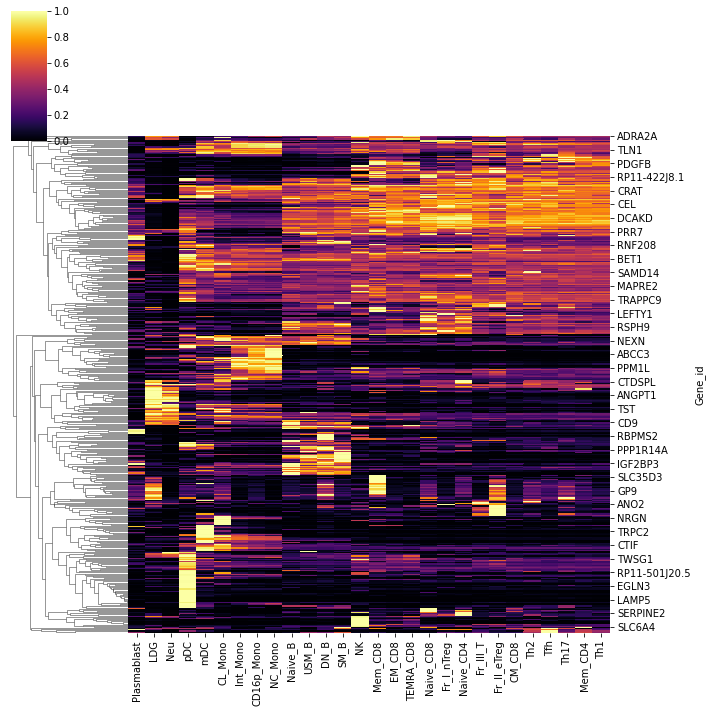

In [158]:
u = [i for i in up if i in ge.index]
u = set(u)
d = [i for i in down if i in ge.index]
d = set(d)
u = ge.loc[u]
d = ge.loc[d]

u.index = u.index.map(mapper)
d.index = d.index.map(mapper)

ordered_cols = ['Plasmablast', 'LDG', 'Neu', 'pDC', 'mDC', 'CL_Mono', 'Int_Mono',
       'CD16p_Mono', 'NC_Mono', 'Naive_B', 'USM_B', 'DN_B', 'SM_B', 'NK',
       'Mem_CD8', 'EM_CD8', 'TEMRA_CD8', 'Naive_CD8', 'Fr_I_nTreg',
       'Naive_CD4', 'Fr_III_T', 'Fr_II_eTreg', 'CM_CD8', 'Th2', 'Tfh', 'Th17',
       'Mem_CD4', 'Th1']

# normalize up and down genes

def standard_scale(x):
    return (x-x.min())/x.max()

#sns.heatmap(u, cmap='inferno')


u = u.apply(standard_scale, axis=1)
d = d.apply(standard_scale, axis=1)

u = u.loc[:, ordered_cols]
d = d.loc[:, ordered_cols]

sns.clustermap(u, col_cluster=False, cmap='inferno')

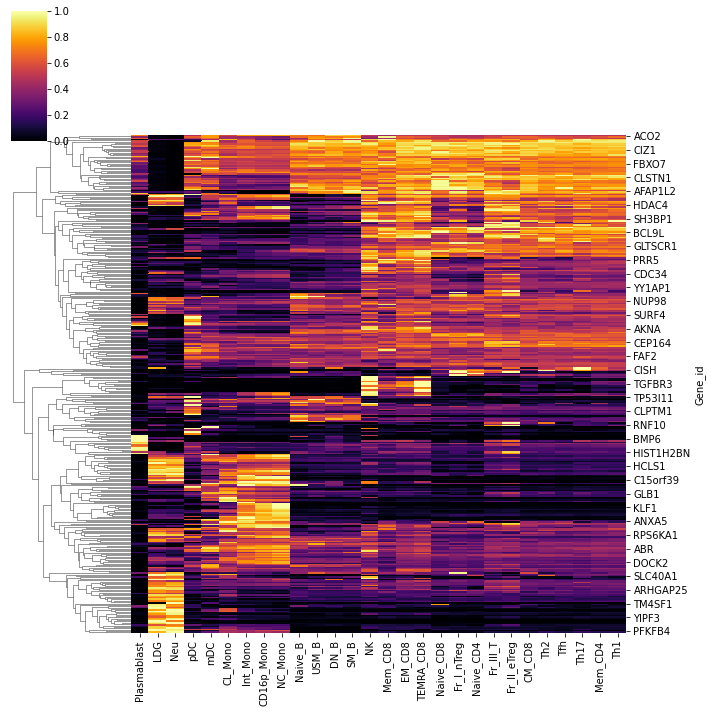

In [164]:
sns.clustermap(d, col_cluster=False, cmap='inferno')

In [ ]:
# so now just write a function to plot heatmaps for trans-eQTLs, with the EA/OA harmonized according to the Variant object

def plot_trans(ax, variant):
    trans_df = lookup_trans(variant)

def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of keyword arguments to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    
    return out